In [34]:
import numpy as  np
import matplotlib.pyplot as plt

In [35]:
# Inputs
cell_doubling = 17.0                # cell doubling time (h)
siRNA_half_life = 24.0              # siRNA half life (h)
mRNA_half_life = 7                  # mRNA half life (h)
prot_half_life = 26                 # protein half life (h)

siRNA0 = 1500                       # extra cellular RNA transfection concentration (nM)
transfection_time = 0.08            # time for which cells exposed to extra cellular RNA (h)

V_ex = 100 * 10 ** -6               # transfection volume (L)
V_in = 2000 * 10 ** -15             # intracellular volume (L)

mol_M = 6.022 * 10 ** 23            # (number/mole)

rtot = 1.9 * 10 ** 15               # (number/L)
r_tot = rtot / mol_M * (10 ** 9)    # (nM)

# Initial concentrations
z0 = [siRNA0, 0, 0, 100, 100]        # External RNA, intracellular RNA, RISC, mRNA, prot
DNA = 100                            # (nM)   

siRNA_ex = np.ones(n) * z0[0]
siRNA = np.ones(n) * z0[1]
RISC = np.ones(n) * z0[2]
mRNA = np.ones(n) * z0[3]
prot = np.ones(n) * z0[4]

In [60]:
# Rates
k_sdeg = 0.69315 / siRNA_half_life    # (h^-1)       first order rate constant
k_sdil = 0.69315 / cell_doubling      # (h^-1)       first order rate constant
k_mRNA = 0.69315 / mRNA_half_life     # (h^-1)       first order rate constant
k_mdeg = 0.69315 / mRNA_half_life     # (h^-1)       first order rate constant
k_risc_orig = 2 * 10 ** -19           # (L/h/number) second order rate constant
k_risc_M = k_risc_orig * mol_M        # (M^-1 h^-1)  secont order rate constant
k_risc = k_risc_M * 10 ** -9          # (nM^-1 h^-1) second order rate constant
k_cleav = 5 * 10 ** 2                # (nM^-1 h^-1) second order rate constant
k_prot = 0.69315 / prot_half_life     # (h^-1)       first order rate constant
k_pdeg = 0.69315 / prot_half_life     # (h^-1)       first order rate constant
k_rdeg = 0.077                        # (h^-1)      first order rate constant

k_int = 7.2 * 10 ** -11         # (h^-1) optimized rate constant (first order)

In [61]:
# Time and steps
t0 = 0
tf_transfection = 200.0
dt = 0.01
t = np.linspace(t0,tf_transfection,int(tf_transfection/dt + dt))
n = len(t)

In [62]:
# ODEs

for i in range(1,n):
    siRNA_ex[i] = (-k_int * siRNA_ex[i-1]) * dt + siRNA_ex[i-1]
    if i > (transfection_time / dt):
        siRNA_ex[i] = 0
    siRNA[i] = ((k_int * (V_ex/V_in) * siRNA_ex[i-1]) - k_sdeg * siRNA[i-1] - k_sdil * siRNA[i-1]) * dt + siRNA[i-1]
    RISC[i] = (k_risc * siRNA[i-1] *(r_tot - RISC[i-1]) - k_rdeg * RISC[i-1]) * dt + RISC[i-1]
    if RISC[i] > r_tot:
        RISC[i] = r_tot
    mRNA[i] = (k_mRNA * DNA - k_mdeg * mRNA[i-1] - k_cleav * mRNA[i-1] * RISC[i-1]) * dt + mRNA[i-1]
    if mRNA[i] < 0:
        mRNA[i] = 0
    prot[i] = (k_prot * mRNA[i-1] - k_pdeg * prot[i-1]) * dt + prot[i-1]
    if prot[i] < 0:
            prot[i] = 0
    prot_norm = prot / z0[4]
    prot_norm_array = np.array(prot_norm)
    
    
print(prot_norm)
print(prot_norm_array)

[1.         1.         1.         ... 0.97009534 0.97010325 0.97011115]
[1.         1.         1.         ... 0.97009534 0.97010325 0.97011115]


In [63]:
# Experimental Data
x = [0, 24, 48, 72, 96, 168]              # time of measurement
y = [1.00, 0.84, 0.49, 0.43, 0.50, 0.95]  # gene expression levels
err1 = [0.00, 0.06, 0.04, 0.03, 0.04, 0.00]

Text(0, 0.5, 'Relative GFP Expression')

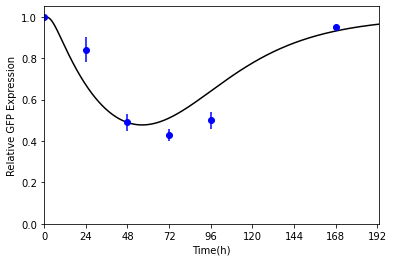

In [64]:
# Plotting

plt.errorbar(x,y,yerr=err1,fmt= 'bo')
plt.plot(t,prot_norm, 'k')
plt.ylim(0,1.05)
plt.yticks(np.arange(0,1.1,0.2))
plt.xlim(0,193)
plt.xticks(np.arange(0,193,24))
plt.xlabel('Time(h)')
plt.ylabel('Relative GFP Expression')